In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [149]:
%matplotlib inline

In [150]:
data = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

,Survived
Sex,
female,0.742038
male,0.188908


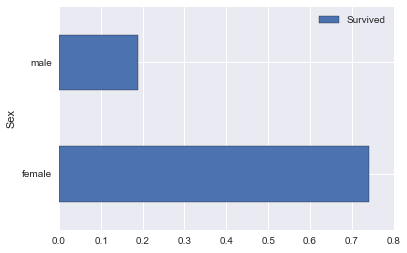

In [151]:
sex_survivor_table = pd.pivot_table(data, index=["Sex"], values=["Survived"])
sex_survivor_table.plot(kind="barh")
sex_survivor_table

In [152]:
test["Survived"] = 0
test.loc[test["Sex"] == "female", "Survived"] = 1
test = test[["PassengerId", "Survived"]]
test.to_csv("titanic/gender_test.csv", index=False)

In [338]:
def create_age_range(age):
    if str(age) == "nan":
        return "adult"
    elif age >= 18 :
        return "adult"
    else:
        return "child"
    
data["AgeRange"] = data["Age"].map(create_age_range)

Survived
Gender AgeRange             
0      adult        0.809859
       child        0.690909
       elderly      1.000000
       young adult  0.675439
1      adult        0.213235
       child        0.396552
       elderly      0.105263
       young adult  0.114035

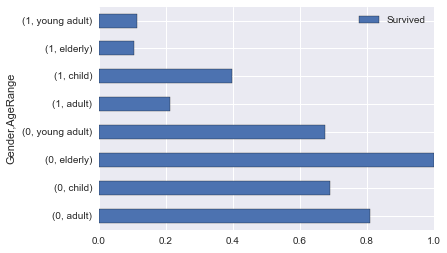

In [246]:
age_sex_survivor_table = pd.pivot_table(data, index=["Gender", "AgeRange"], values=["Survived"])
age_sex_survivor_table.plot(kind="barh")
age_sex_survivor_table

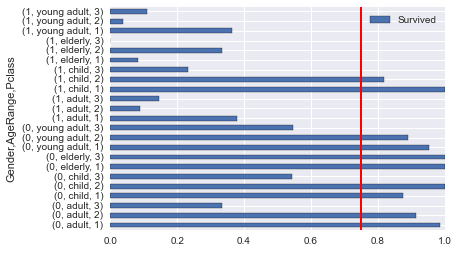

In [283]:
age_sex_survivor_table = pd.pivot_table(data, index=["Gender", "AgeRange", "Pclass"], values=["Survived"])
age_sex_survivor_table.plot(kind="barh")
age_sex_survivor_table
plt.axvline(x=0.75, linewidth=2, color='r')


Survived
Gender AgeRange    Pclass TicketRange          
0      adult       1      $20-30       0.857143
                          < $30        1.000000
                   2      $10-20       0.920000
                          $20-30       0.900000
                          < $30        1.000000
                   3      $10-20       0.500000
                          $20-30       0.272727
                          < $10        0.222222
                          < $30        0.000000
       child       1      $20-30       1.000000
                          < $30        0.857143
                   2      $10-20       1.000000
                          $20-30       1.000000
                          < $30        1.000000
                   3      $10-20       0.733333
                          $20-30       0.166667
                          < $10        0.857143
                          < $30        0.000000
       elderly     1      < $30        1.000000
                   3      < $10        1.000000
       young adult 1      $20-30       1.000000
                          < $30        0.947368
                   2      $10-20       0.857143
                          $20-30       0.888889
                          < $30        1.000000
                   3      $10-20       0.500000
                          $20-30       0.444444
                          < $10        0.617021
                          < $30        0.000000
1      adult       1      $20-30       0.466667
                          < $10        0.000000
                          < $30        0.340909
                   2      $10-20       0.135135
                          $20-30       0.041667
                          < $10        0.000000
                          < $30        0.000000
                   3      $10-20       0.000000
                          $20-30       0.000000
                          < $10        0.157303
                          < $30        0.666667
       child       1      < $30        1.000000
                   2      $10-20       0.750000
                          $20-30       0.857143
                   3      $10-20       0.714286
                          $20-30       0.157895
                          < $10        0.153846
                          < $30        0.000000
       elderly     1      $20-30       0.125000
                          < $30        0.000000
                   2      $10-20       0.333333
                   3      < $10        0.000000
       young adult 1      $20-30       1.000000
                          < $30        0.300000
                   2      $10-20       0.052632
                          $20-30       0.000000
                          < $30        0.000000
                   3      $10-20       0.200000
                          $20-30       0.111111
                          < $10        0.084416
                          < $30        0.375000

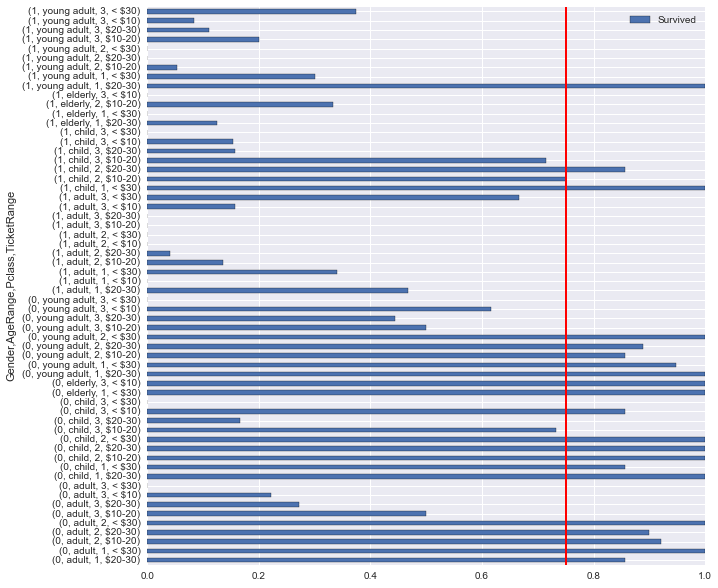

In [281]:
def ticket_value(amount):
    if amount < 10:
        return "< $10"
    elif amount >= 10 and amount < 20:
        return "$10-20"
    elif amount >= 20 and amount < 30: 
        return "$20-30"
    elif amount >= 30 and amount < 40: 
        return "$20-30"
    else:
        return "< $30"
    
data["TicketRange"] = data["Fare"].apply(ticket_value)

price_survivor_table = pd.pivot_table(data, index=["Gender", "AgeRange", "Pclass", "TicketRange"], values=["Survived"])
price_survivor_table.plot(kind="barh", figsize=(10, 10))
plt.axvline(x=0.75, linewidth=2, color='r')
price_survivor_table

In [157]:
test = pd.read_csv("titanic/test.csv")
test['Survived'] = 0

test.loc[(test["Sex"] == "female"), "Survived"] = 1
test.loc[(test["Sex"] == "female") & (test["Fare"] > 20) & (test["Pclass"] == 3), "Survived"] = 0
test = test[["PassengerId", "Survived"]]
test.to_csv("titanic/gender_age_set.csv", index=False)

In [146]:
def calc_median_ages(df):
    median_ages = np.zeros((2,3))
    
    # find median age for each combination of Gender and Pclass
    
    for i in range(0, 2):
        for j in range(0, 3):
            median_ages[i,j] = df[(df['Gender'] == i) & \
                                  (df['Pclass'] == j+1)]['Age'].dropna().median()
            
    return median_ages


def guess_ages(df, median_ages=None):
    if median_ages is None:
        median_ages = calc_median_ages(df)
    df['GuessedAge'] = pd.isnull(df.Age).astype(int)

    # Get each combination of Gender and Pclass that is null and set it's 
    # `Age` to the median age associated with it's Gender and Pclass
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[(df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1),\
                    'Age'] = median_ages[i,j]
    return df
      
def clean(df, median_ages=None):
    df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    df = guess_ages(df, median_ages)
    df = df.drop(['Ticket', 'Cabin', 'Sex'], axis=1)
    
    return df

In [177]:
data = clean(data)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,AgeRange,TicketRange,Gender,GuessedAge
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,7.2500,S,adult,< $10,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,71.2833,C,adult,< $30,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,7.9250,S,adult,< $10,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,53.1000,S,adult,< $30,0,0
4,5,0,3,"Allen, Mr. William Henry",35,0,0,8.0500,S,adult,< $10,1,0


Survived
Gender Parch          
0      0      0.788660
       1      0.766667
       2      0.612245
       3      0.750000
       4      0.000000
       5      0.250000
       6      0.000000
1      0      0.165289
       1      0.327586
       2      0.322581
       3      0.000000
       4      0.000000
       5      0.000000

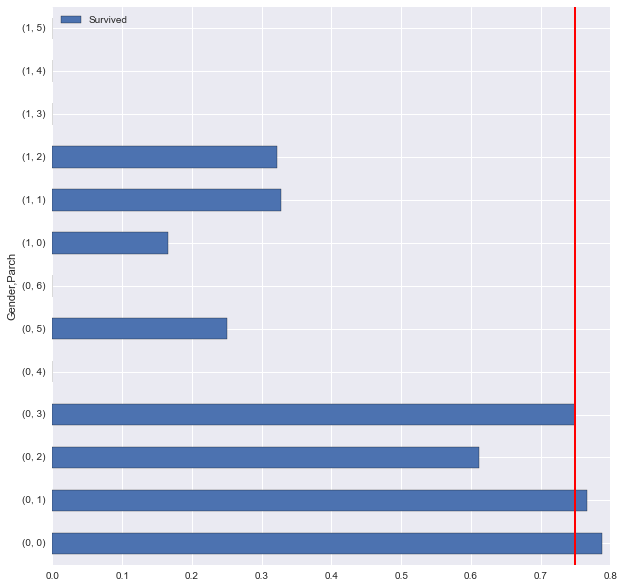

In [354]:
price_survivor_table = pd.pivot_table(data, index=["Gender", "Parch"], values=["Survived"])
price_survivor_table.plot(kind="barh", figsize=(10, 10))
plt.axvline(x=0.75, linewidth=2, color='r')
price_survivor_table

In [341]:
data[(data.Gender == 1) & (data.SibSp == 0) & (data.Parch == 2)]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,AgeRange,TicketRange,Gender,GuessedAge
78,79,1,2,"Caldwell, Master. Alden Gates",0.83,0,2,29.0000,S,child,$20-30,1,0
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",36.50,0,2,26.0000,S,adult,$20-30,1,0
153,154,0,3,"van Billiard, Mr. Austin Blyler",40.50,0,2,14.5000,S,adult,$10-20,1,0
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",9.00,0,2,20.5250,S,child,$20-30,1,0
377,378,0,1,"Widener, Mr. Harry Elkins",27.00,0,2,211.5000,C,adult,< $30,1,0
445,446,1,1,"Dodge, Master. Washington",4.00,0,2,81.8583,S,child,< $30,1,0
550,551,1,1,"Thayer, Mr. John Borland Jr",17.00,0,2,110.8833,C,child,< $30,1,0
659,660,0,1,"Newell, Mr. Arthur Webster",58.00,0,2,113.2750,C,adult,< $30,1,0
827,828,1,2,"Mallet, Master. Andre",1.00,0,2,37.0042,C,child,$20-30,1,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Gender         418 non-null int64
GuessedAge     418 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 35.9+ KB


,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Gender,GuessedAge
0,892,3,"Kelly, Mr. James",34.5,0,0,7.8292,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,Q,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,S,0,0


In [316]:
test = pd.read_csv("titanic/test.csv")
median_ages = calc_median_ages(data)
test = clean(test, median_ages)
test['Survived'] = 0

test.loc[(test["Gender"] == 0), "Survived"] = 1
test.loc[(test["Gender"] == 0) & (test["Fare"] > 20) & (test["Pclass"] == 3), "Survived"] = 0
test.loc[(test["Gender"] == 1) & (test["Age"] < 18) & (test["Pclass"] < 3), "Survived"] = 1
test = test[["PassengerId", "Survived"]]
test.to_csv("titanic/fourth_try.csv", index=False)

In this run, I had male children under the age of 18 who were in 1st or 2nd class all survive. This resulted in a .785 prediction rating, qualifying the homework assignment's challenge.'

In [332]:
test = pd.read_csv("titanic/test.csv")
test = clean(test, median_ages)

test["AgeRange"] = test["Age"].map(create_age_range)

median_ages = calc_median_ages(data)

test['Survived'] = 0

test.loc[(test["Gender"] == 0), "Survived"] = 1
test.loc[(test["Gender"] == 0) & (test["Fare"] > 20) & (test["Pclass"] == 3), "Survived"] = 0
test.loc[(test["Gender"] == 0) & (test["Parch"] >= 3) & (test["AgeRange"] == "adult"), "Survived"] = 0
test.loc[(test["Gender"] == 1) & (test["Age"] < 18) & (test["Pclass"] < 3), "Survived"] = 1
test = test[["PassengerId", "Survived"]]
test.to_csv("titanic/seventh_try.csv", index=False)

Same as best entry

In [345]:
test = pd.read_csv("titanic/test.csv")
test = clean(test, median_ages)

test["AgeRange"] = test["Age"].map(create_age_range)

median_ages = calc_median_ages(data)

test['Survived'] = 0

test.loc[(test["Gender"] == 0), "Survived"] = 1
test.loc[(test["Gender"] == 0) & (test["Fare"] > 20) & (test["Pclass"] == 3), "Survived"] = 0
test.loc[(test["Gender"] == 0) & (test["Parch"] >= 3) & (test["AgeRange"] == "adult"), "Survived"] = 0
test.loc[(test["Gender"] == 1) & (test["Age"] < 18) & (test["Pclass"] < 3), "Survived"] = 1
test.loc[(test["Gender"] == 1) & (test["SibSp"] == 0) & (test["Parch"] == 2), "Survived"] = 1
test = test[["PassengerId", "Survived"]]
test.to_csv("titanic/eigth_try.csv", index=False)

Didn't work any better

In [356]:
test = pd.read_csv("titanic/test.csv")
test = clean(test, median_ages)

test["AgeRange"] = test["Age"].map(create_age_range)

median_ages = calc_median_ages(data)

test['Survived'] = 0

test.loc[(test["Gender"] == 0), "Survived"] = 1
test.loc[(test["Gender"] == 0) & (test["Fare"] > 20) & (test["Pclass"] == 3), "Survived"] = 0
test.loc[(test["Parch"] >= 3), "Survived"] = 0
test.loc[(test["Gender"] == 1) & (test["Age"] < 18) & (test["Pclass"] < 3), "Survived"] = 1
test = test[["PassengerId", "Survived"]]
test.to_csv("titanic/ninth_try.csv", index=False)

The same

In [357]:
test = pd.read_csv("titanic/test.csv")
test = clean(test, median_ages)

test["AgeRange"] = test["Age"].map(create_age_range)

median_ages = calc_median_ages(data)

test['Survived'] = 0

test.loc[(test["Gender"] == 0), "Survived"] = 1
test.loc[(test["Gender"] == 0) & (test["Fare"] > 20) & (test["Pclass"] == 3), "Survived"] = 0
test.loc[(test["Parch"] >= 3), "Survived"] = 0
test.loc[(test["Gender"] == 1) & (test["Age"] < 18), "Survived"] = 1
test = test[["PassengerId", "Survived"]]
test.to_csv("titanic/ninth_try.csv", index=False)

had all male children survive - made things worse

In [359]:
test = pd.read_csv("titanic/test.csv")
test = clean(test, median_ages)

test["AgeRange"] = test["Age"].map(create_age_range)

median_ages = calc_median_ages(data)

test['Survived'] = 0

test.loc[(test["Gender"] == 0) & (test["Parch"] <= 3), "Survived"] = 1
test = test[["PassengerId", "Survived"]]
test.to_csv("titanic/tenth_try.csv", index=False)